# **Introduction**

# **Multi-Linear Regression using Python**

*by: Rafi Atha Ganiza*

---

이 노트북은 Python을 사용하여 다중 선형 회귀 분석(Multiple Linear Regression Analysis)을 보여주기 위해 만들어졌습니다. 회귀 분석 자체는 종속 변수(response variable)와 하나 이상의 독립 변수(independent variable) 사이의 관계를 특성화하는 통계 모델을 구축하기 위한 도구입니다. **단순 선형 회귀(Simple Linear Regression)**는 독립 변수가 하나만 있을 때 사용되는 방법을 나타냅니다. 반면에, **다중 선형 회귀(Multi-Linear Regression)**는 독립 변수가 하나 이상일 때 사용되는 방법을 나타냅니다. 다중 선형 회귀는 아래와 같이 표현될 수 있습니다:

<div align="center">
$ \hat{y} = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{k}X_{k} $
</div>

*where:*

*$\hat{y}:$ 종속 변수 (예측 값)*

*$\beta_{0}:$ 절편 추정값*

*$\beta_{k}X_{k}:$ 기울기 추정값*

이 예제에서는 제품의 가격, 광고 비용 및 제품 판매 수와의 관계를 다중 선형 회귀로 분석해보려고 합니다. 또한 특정 제품의 가격 및 광고 비용을 고려하여 얼마나 많은 제품이 팔릴지 예측해보려고 합니다.

# 준비작업

아래의 코드 셀에서는 Pandas, NumPy, matplotlib, sklearn 등 우리가 사용할 Python 라이브러리를 불러올 것입니다. 또한 Pandas 라이브러리를 사용하여 GitHub에서 데이터셋을 불러와 `df_pie`라는 데이터프레임에 저장할 것입니다.

In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI-Linear-Regression/main/data/pie-sales.csv',
                     index_col='week', sep=';')

print(df_pie.shape)
df_pie

(15, 3)


,pie_sales,price,advertising
week,,,
1,350,5.5,3.3
2,460,7.5,3.3
3,350,8.0,3.0
4,430,8.0,4.5
5,350,6.8,3.0
6,380,7.5,4.0
7,430,4.5,3.0
8,470,6.4,3.7
9,450,7.0,3.5


위에서 볼 수 있듯이 우리의 데이터셋은 3개의 열(pie_sales, price, advertising)과 15개의 행으로 구성되어 있습니다. 우리는 파이의 가격과 광고 비용에 따라 얼마나 많은 파이가 팔릴지 예측해보려고 합니다.

# 기술 분석(Descriptive Analysis)

다중 선형 회귀를 사용하기 전에, 우리의 데이터를 더 잘 이해하고 각 변수 사이에 어떤 관계가 있는지 확인하기 위해 데이터를 시각화하는 것이 좋습니다. 이를 위해 Seaborn 라이브러리의 `pairplot()` 함수를 사용할 것입니다. 이 함수는 각 변수 간의 히스토그램과 산점도를 포함한 그림을 출력합니다.

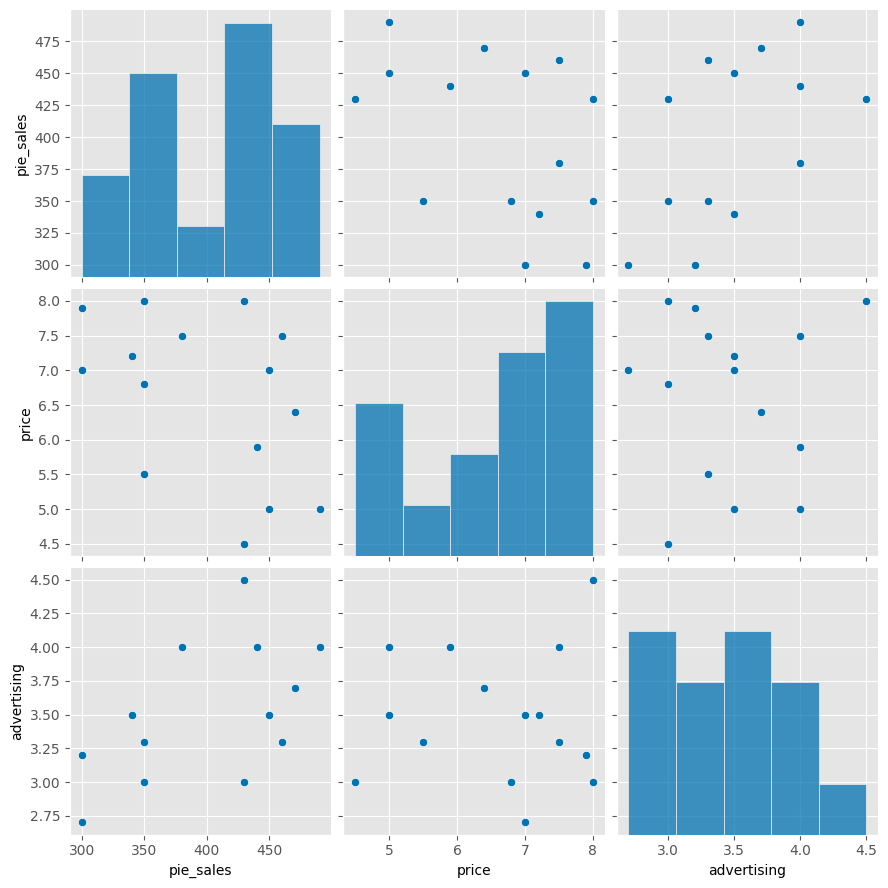

In [2]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df_pie, height=3)

그림의 첫 번째 행을 보면 가격, 광고 및 pie_sales 사이에 관계가 있을 수 있음을 알 수 있습니다. 파이 판매와 가격 사이의 산점도는 음의 관계 패턴을 보여주는데, 이는 가격이 높을수록 판매량이 낮아진다는 것을 의미합니다. 반면에 광고와 파이 판매 사이의 산점도는 양의 관계를 보여주는데, 광고에 더 많은 돈을 사용할수록 더 많은 파이를 팔게 됩니다.

# 회귀 모델 구축

우리가 독립 변수와 종속 변수 사이에 관계가 있을 수 있다는 것을 이미 확인했으므로, 회귀 모델을 구축하는 것을 계속 진행합시다. `sklearn` 라이브러리의 `LinearRegression()` 함수를 사용하여 모델을 구축할 것입니다.

In [ ]:
# Set independent and dependent variables
X = df_pie[['price', 'advertising']]
y = df_pie['pie_sales']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 306.5261932837436
Coefficients: [-24.97508952  74.13095749]


위의 코드는 모델에서 몇 가지 중요한 값을 출력했습니다. 그 값들은 모델의 절편(y-intercept)과 계수(regression coefficients) 값으로, 아래와 같은 수식에 넣을 수 있습니다:

<div align="center"> $\hat{y} = 306.5261 - 24.975X_{1} + 74.1309X_{2}$ </div>

각 숫자가 무엇을 의미하는지 자세히 살펴보겠습니다:

*   절편 값은 모든 독립 변수의 값이 0일 때 종속 변수의 예상 평균 값입니다. 우리의 경우, 이는 파이의 가격을 0으로 판매하고 광고 비용을 0으로 소비하면 약 306개의 파이를 팔게 될 것이라는 것을 의미합니다.
*   계수의 경우, 가격과 광고 변수에 대해 각각 2개의 값을 가집니다. 이 값은 독립 변수와 종속 변수 간의 관계를 나타내며, 독립 변수에서 정확히 1만큼의 변화가 종속 변수의 값을 계수만큼 변화시킵니다. 예를 들어, 광고 비용을 10만큼 늘리면 판매량도 약 741개의 파이(74.1309 * 10)만큼 늘어납니다.

이제 아래에 우리의 데이터를 입력하여 파이 판매를 예측해 보겠습니다...

In [ ]:
# Values to predict
price = input('What is the price of the pie? \n')
advertising = input('How much money are you going to spend for advertising? \n')

try:
    print('We predict {:.0f} pies will be sold if we sold the pie at ${} and spend ${} at advertising.'.format(
        model.predict([[float(price), float(advertising)]])[0],
        price,
        advertising))
except ValueError:
    print('Please only input either:\n- whole number e.g. 1, 4, 7\n- decimal/float number e.g. 3.8')

What is the price of the pie? 
23
How much money are you going to spend for advertising? 
1
We predict -194 pies will be sold if we sold the pie at $23 and spend $1 at advertising.


다음 단계로 진행하기 전에 아래의 코드 셀을 사용하여 모델을 3D 그래프로 시각화해 보겠습니다. 우리는 선형 모델을 파란색 평면으로 그리고 데이터 포인트를 회색 점으로 그래프에 표시할 것입니다.

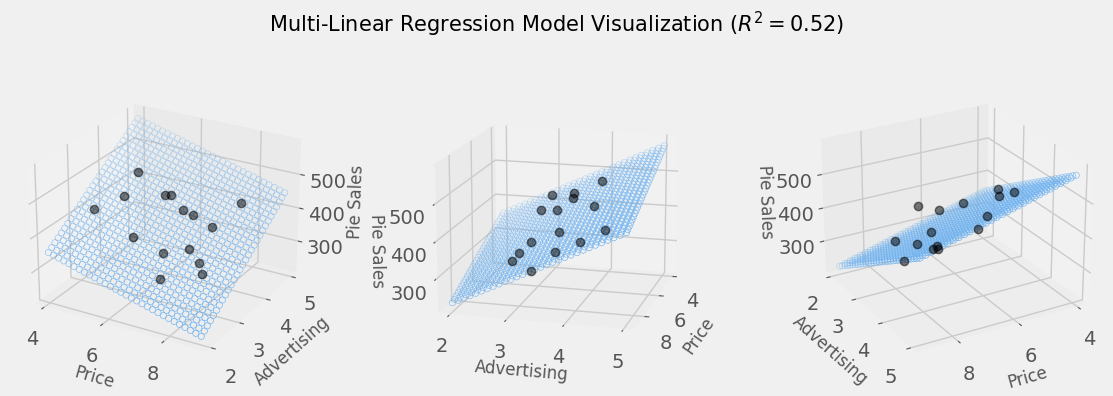

In [ ]:
# Prepare data
X = df_pie[['price', 'advertising']].values.reshape(-1,2)
Y = df_pie['pie_sales']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

xx_pred = np.linspace(4, 9, 30)  # range of price values
yy_pred = np.linspace(2, 5, 30)  # range of advertising values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model built on previous step
# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate model by using it's R^2 score
r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Price', fontsize=12)
    ax.set_ylabel('Advertising', fontsize=12)
    ax.set_zlabel('Pie Sales', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()

23Here is the full 360° view of the model visualization:

<div align="center">
<img src="https://raw.githubusercontent.com/rafiag/DTI-Linear-Regression/main/images/Multi-Linear%20Regression%20Model%20Visualization.gif" height='300'><br>
<a href='https://github.com/rafiag/DTI2020/blob/main/images/Multi-Linear%20Regression%20Model%20Visualization.gif'>Click here if the image failed to load.</a>
<div>

# 모델 검증

모델을 구축한 후에는 그 성능을 검증하는 것이 중요합니다. 우리는 결정 계수($R^2$), F-검정, t-검정, 그리고 잔차를 보며 모델을 평가할 수 있습니다. 계속하기 전에 `OLS()` 함수를 사용하여 `statsmodel` 라이브러리를 사용하여 모델을 다시 구축하겠습니다. 그런 다음 모델에 `summary()` 함수를 사용하여 모델 요약을 출력합니다. 모델 요약에는 모델을 평가하는 데 사용할 수 있는 많은 중요한 값이 포함되어 있습니다.

In [ ]:
X = df_pie[['price', 'advertising']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df_pie['pie_sales'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Tue, 10 Oct 2023   Prob (F-statistic):             0.0120
Time:                        07:43:03   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

## 결정 계수; Coefficient of Determination ($R^2$)

결정 계수는 종속 변수의 총 변동 중에서 독립 변수의 변동에 의해 설명되는 부분입니다. $R^2$ 점수는 다음과 같이 계산됩니다:

<div align="center"> $R^2 = \frac{\sum(\hat{Y_i}-\bar{Y})^2}{\sum(Y_i-\bar{Y})^2}$ </div>

statsmodel에서 우리는 모델의 `.rsquared` 속성에 접근하여 우리 모델의 $R^2$ 값을 얻을 수 있습니다.

In [ ]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.5214779360292288


$R^2$는 0과 1 사이의 범위를 가집니다. 여기서 $R^2=0$은 변수 간에 선형 관계가 없음을 의미하고 $R^2=1$은 완벽한 선형 관계를 나타냅니다. 우리의 경우, 우리는 대략 $R^2$ 점수 0.5214를 얻었는데, 이는 우리의 독립 변수를 사용하여 종속 변수의 52.14%를 설명할 수 있음을 의미합니다.

## F-검정(F-test; ANOVA)

F-검정 또는 다중 선형 회귀에서의 ANOVA (분산 분석)는 우리의 복잡한 모델이 더 간단한 모델(예: 오직 하나의 독립 변수만 있는 모델)보다 더 나은 성능을 내는지 확인하는 데 사용할 수 있습니다. F-검정을 사용하면 모델이 얻은 값만큼 높은 F-통계량을 관측할 확률을 계산하여 모델의 유의성을 평가할 수 있습니다. $R^2$ 점수와 마찬가지로 우리는 모델의 .fvalue 및 `.f_pvalue` 속성에 접근하여 F-통계량 및 해당 F-통계량의 확률을 쉽게 얻을 수 있습니다.

In [ ]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 6.538606789020471
Probability of observing value at least as high as F-statistic: 0.012006372233186369


Because our f_pvalue is lower than 0.05 **we can conclude that our model performs better than other simpler model.**

## T검정(T-test)

t-통계량은 계수를 그것의 표준 오차로 나눈 값입니다. 표준 오차는 계수의 표준 편차의 추정치로, 경우에 따라 얼마나 변하는지를 나타냅니다. 이는 회귀 계수가 측정되는 정확도의 척도로 생각할 수 있습니다. F-검정과 마찬가지로 *p*-value는 우리 모델이 가진 것처럼 극단적인 결과를 보는 확률을 나타냅니다. 또한 모델에서 `.pvalues` 속성을 호출하여 모든 변수에 대한 *p*-value를 얻을 수 있습니다.

In [ ]:
print(olsmod.pvalues)

const          0.019932
price          0.039788
advertising    0.014494
dtype: float64


우리의 두 독립 변수인 가격과 광고 모두 p-값이 0.05보다 작은데, **이는 가격과 광고가 파이 판매에 영향을 미친다는 충분한 증거가 있다는 것을 보여줍니다.**

## Assumption Testing

## 가정 검정
다음으로, 우리는 잔차 분석(residual analysis)을 통해 우리의 모델을 검증하겠습니다. 아래는 우리의 모델의 유효성을 확인하기 위해 할 테스트 또는 가정의 목록입니다:

1.   선형성(Linearity)
2.   정규성(Normality)
3.   다중공선성(Multicollinearity)
4.   자기상관성(Autocorrelation)
5.   등분산성(Homoscedasticity)

잔차는 관측값(observed value)과 데이터셋에서 예측값(predicted value) 간의 차이입니다. statsmodel을 사용하면 모델의 `.resid` 속성에 단순히 접근함으로써 우리 모델의 잔차 값을 쉽게 얻을 수 있으며 그런 다음 우리의 `df_pie` 데이터프레임에 'residual'이라는 새로운 열에 그 값을 유지할 수 있습니다.

In [ ]:
df_pie['pie_sales_pred'] = olsmod.predict(X)
df_pie['residual'] = olsmod.resid
df_pie.head()

,pie_sales,price,advertising,pie_sales_pred,residual
week,,,,,
1,350,5.5,3.3,413.795361,-63.795361
2,460,7.5,3.3,363.845182,96.154818
3,350,8.0,3.0,329.118350,20.881650
4,430,8.0,4.5,440.314786,-10.314786
5,350,6.8,3.0,359.088457,-9.088457


### 선형성(Linearity)

이것은 독립 변수(independent variables)와 종속 변수(dependent variable) 사이에 선형 관계(linear relationship)가 있다고 가정합니다. 우리의 경우 여러 독립 변수가 있기 때문에 실제 값 대비 예측 값을 보기 위해 산점도(scatter plot)를 사용하여 이것을 할 수 있습니다.

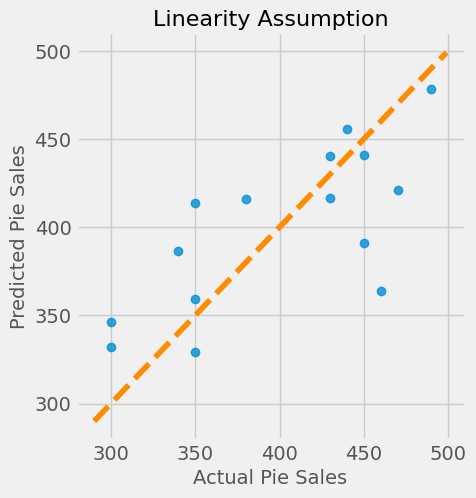

In [ ]:
# Plotting the observed vs predicted values
sns.lmplot(x='pie_sales', y='pie_sales_pred', data=df_pie, fit_reg=False)

# Plotting the diagonal line
line_coords = np.arange(df_pie[['pie_sales', 'pie_sales_pred']].min().min()-10,
                        df_pie[['pie_sales', 'pie_sales_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Pie Sales', fontsize=14)
plt.xlabel('Actual Pie Sales', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

산점도(scatter plot)는 대각선(diagonal line) 주변에 균일하게 퍼진 잔차 점(residual point)을 보여줍니다. **따라서 우리는 독립 변수(independent variable)와 종속 변수(dependent variable) 사이에 선형 관계(linear relationship)가 있다고 가정할 수 있습니다.**

### 정규성(Normality)

이것은 모델의 오류 항(error terms)이 정규 분포를 따르는 것으로 가정합니다. 우리는 잔차의 히스토그램을 통해 정규성을 검사하고 Anderson-Darling 정규성 테스트의 *p*-value를 동시에 보며 잔차의 정규성을 검사하겠습니다. 우리는 *p*-value를 계산하기 위해 statsmodel의 `normal_ad()` 함수를 사용하고 그것을 0.05의 임계값(threshold)과 비교할 것입니다. 만약 우리가 얻은 *p*-value가 임계값(threshold)보다 높다면, 우리는 우리의 잔차가 정규 분포되어 있다고 가정할 수 있습니다.

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.6655438857701688


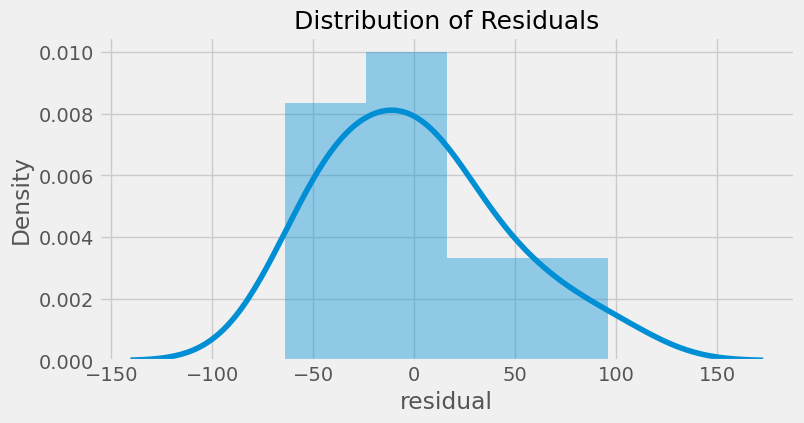

Residuals are normally distributed


In [ ]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_pie['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df_pie['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

위의 코드에서 우리는 0.6644의 *p*-value를 얻었는데, 이는 0.05의 임계값(threshold)보다 높기 때문에 정규로 간주될 수 있습니다. 히스토그램 그래프 역시 정규 분포를 보여줍니다 (우리의 데이터셋에 15개의 관찰만 있기 때문에 약간 치우쳐 보일 수도 있습니다). **이 두 결과 모두에서 우리는 우리의 잔차가 정규 분포되어 있다고 가정할 수 있습니다.**

### 다중공선성(Multicollinearity)

이것은 회귀에 사용되는 예측 변수들이 서로 상관되어 있지 않다고 가정합니다. 예측 변수 간의 어떤 상관관계가 있는지 확인하기 위해 Pandas 데이터프레임의 `corr()` 함수를 사용하여 데이터의 각 열 사이의 Pearson 상관 계수를 계산할 수 있습니다. 그런 다음 Seaborn의 `heatmap()` 함수를 사용하여 그것을 히트맵으로 표시할 수 있습니다.

Pearson correlation coefficient matrix of each variables:
              pie_sales     price  advertising
pie_sales     1.000000 -0.443273     0.556320
price        -0.443273  1.000000     0.030438
advertising   0.556320  0.030438     1.000000


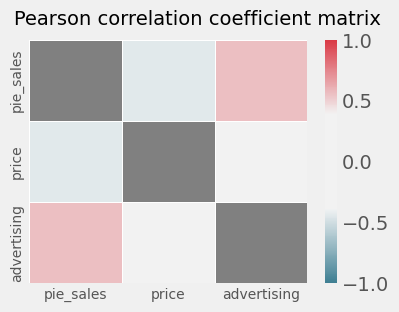

In [ ]:
corr = df_pie[['pie_sales', 'price', 'advertising']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

이 이미지는 광고와 pie_sales 사이에 어느 정도의 양의 상관관계가 있으며, 가격과 pie_sales 사이에는 음의 상관관계가 있음을 보여줍니다. 이 두 결과 모두 이전의 결과 모델을 지지합니다. 가장 중요한 점은, 가격과 광고가 거의 0의 상관 계수를 가지고 있다는 것입니다. **이것은 우리의 두 독립 변수가 서로 영향을 주지 않으며, 우리의 데이터에 다중공선성(multicollinearity)이 없다는 것을 의미합니다.**

### 자기상관성(Autocorrelation)

자기상관은 시간에 따른 오차(잔차; residuals)의 상관 관계입니다. 시간에 따라 데이터가 수집될 때 자기상관(autocorrelation)이 존재하는지 확인하기 위해 사용됩니다. 한 시간대의 잔차가 다른 시간대의 잔차와 관련되어 있으면 자기상관이 존재합니다. 우리는 Durbin-Watson 테스트를 수행하여 양의 상관 관계 또는 음의 상관 관계가 존재하는지 확인할 수 있습니다. 이 단계에서는 statsmodel의 `durbin_watson()` 함수를 사용하여 Durbin-Watson 점수를 계산하고 다음 조건으로 값을 평가합니다:

*   Durbin-Watson 점수가 1.5 미만이면 양의 자기상관이 있으며 가정이 만족되지 않습니다.

*   Durbin-Watson 점수가 1.5에서 2.5 사이이면 자기상관이 없으며 가정이 만족됩니다.

*   Durbin-Watson 점수가 2.5보다 크면 음의 자기상관이 있으며 가정이 만족되지 않습니다.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_pie['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.6831203020921248
Little to no autocorrelation 

Assumption satisfied


우리 모델은 대략 1.6831의 Durbin-Watson 점수를 얻었는데, **이는 1.5와 2.5 사이입니다. 따라서 우리의 잔차에는 자기상관(autocorrelation)이 없다고 가정할 수 있습니다.**

### 등분산성(Homoscedasticity)

이것은 오차항(error term)에 동일한 분산이라는 등분산성(homoscedasticity)을 가정합니다. 등분산성을 위반하는 이분산성(heteroscedasticity)은 오차항 간에 균등한 분산이 없을 때 발생합니다. 등분산성을 감지하기 위해 잔차를 그래프(residual plot)로 그려 분산이 균일해 보이는지 확인할 수 있습니다.

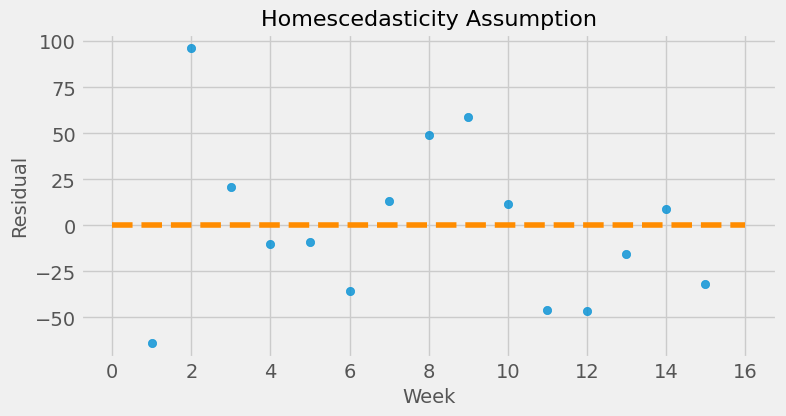

In [ ]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_pie.index, y=df_pie.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_pie.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()

우리는 오직 15개의 data point만 가지고 있지만, 우리의 잔차는 일정하고 균일한 분산을 가지고 있는 것 같습니다. 따라서 등분산성 가정이 만족된다고 가정할 수 있습니다.

# 결론(Conclusion)
우리의 모델은 모델 검증 단계의 모든 테스트를 성공적으로 통과했으므로, 가격과 광고라는 두 개의 독립 변수를 사용하여 미래의 파이 판매량을 잘 예측할 수 있을 것이라고 결론 내릴 수 있습니다. 그러나 여전히 우리의 모델은 $R^2$ 점수가 52.14%로, 파이 판매량에 영향을 주는 알려지지 않은 요인이 약 48%나 된다는 것을 의미합니다.

# References

1. Telkom Digital Talent Incubator - Data Scientist Module 4 (Regression)
2. [Multiple Linear Regression and Visualization in Python](https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python)
3. [Testing Linear Regression Assumptions in Python](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/)